<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_AgglomerativeClustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://www.section.io/engineering-education/hierarchical-clustering-in-python/
- https://vitalflux.com/hierarchical-clustering-explained-with-python-example/

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=names)
# print(dataset.describe())
dataset_attr = dataset[['sepal-length','sepal-width','petal-length','petal-width']]
print(dataset_attr.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


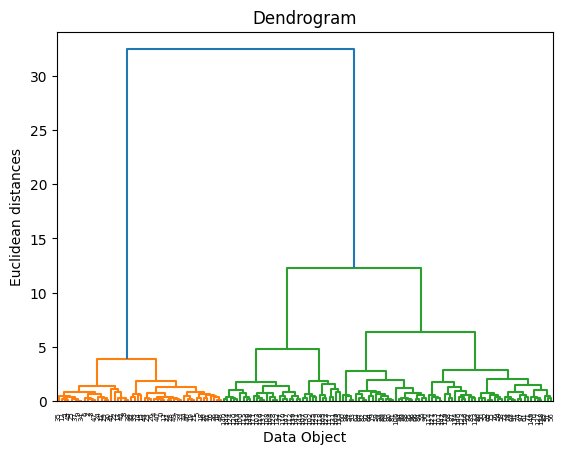

In [3]:
# Generate the dendrogram
dendrogram = sch.dendrogram(sch.linkage(dataset_attr, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Object')
plt.ylabel('Euclidean distances')
plt.show()

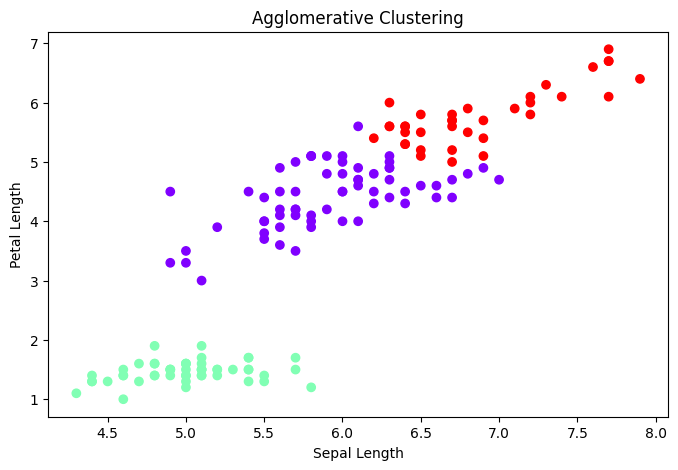

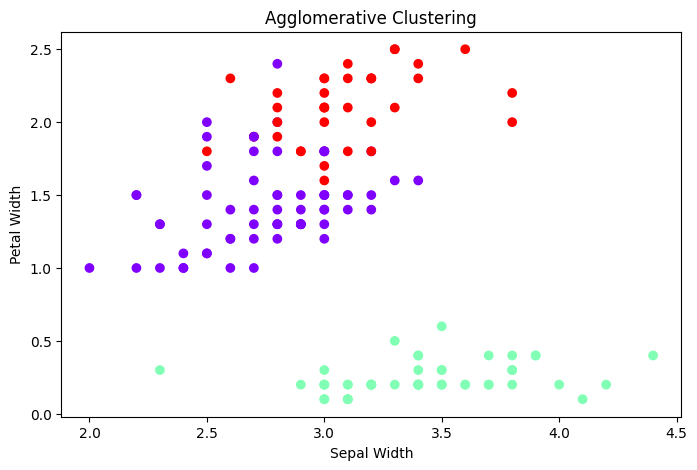

In [4]:
# Do the agglomerative clustering
Agg_hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
y_hc = Agg_hc.fit_predict(dataset_attr)
# print(y_hc)

# Scatter plot - sepal length vs petal length
plt.figure(figsize=(8,5))
plt.scatter(dataset_attr['sepal-length'], dataset_attr['petal-length'], c = y_hc, cmap = 'rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

# Scatter plot - sepal width vs petal width
plt.figure(figsize=(8,5))
plt.scatter(dataset_attr['sepal-width'], dataset_attr['petal-width'], c = y_hc, cmap = 'rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

In [5]:
# Evaluating Agglomerative clustering results
silhouette_score(dataset_attr, y_hc)

0.5540972908150553